<a href="https://colab.research.google.com/github/shubham-datascience/simple_regression/blob/main/simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import files
uploaded =files.upload() 

Saving FuelConsumption.csv to FuelConsumption.csv


In [ ]:
import io
ds=pd.read_csv(io.StringIO(uploaded["FuelConsumption.csv"].decode('utf-8')))
print(ds)

      MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0          2014  ACURA  ...                       33          196
1          2014  ACURA  ...                       29          221
2          2014  ACURA  ...                       48          136
3          2014  ACURA  ...                       25          255
4          2014  ACURA  ...                       27          244
...         ...    ...  ...                      ...          ...
1062       2014  VOLVO  ...                       24          271
1063       2014  VOLVO  ...                       25          264
1064       2014  VOLVO  ...                       24          271
1065       2014  VOLVO  ...                       25          260
1066       2014  VOLVO  ...                       22          294

[1067 rows x 13 columns]


In [ ]:
cdf = ds[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


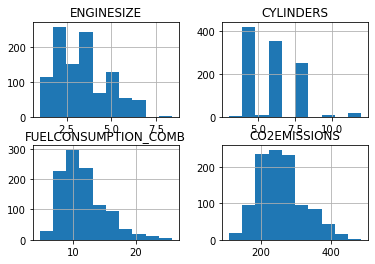

In [ ]:
display=cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
display.hist()
plt.show()

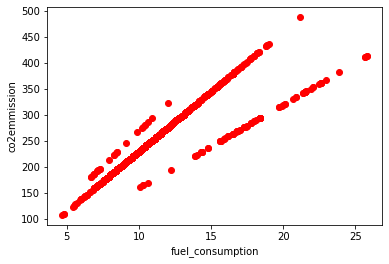

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color= 'red')
plt.xlabel("fuel_consumption")
plt.ylabel("co2emmission")
plt.show()

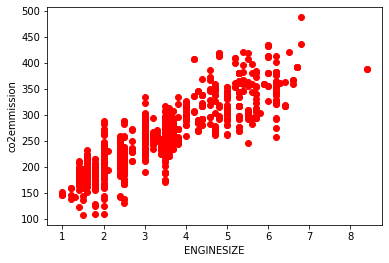

In [ ]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color= 'red')
plt.xlabel("ENGINESIZE")
plt.ylabel("co2emmission")
plt.show()

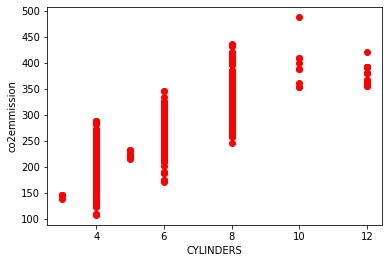

In [ ]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color= 'red')
plt.xlabel("CYLINDERS")
plt.ylabel("co2emmission")
plt.show()

In [ ]:
mask=np.random.rand(len(ds))<0.8
train=cdf[mask]
test=cdf[~mask]

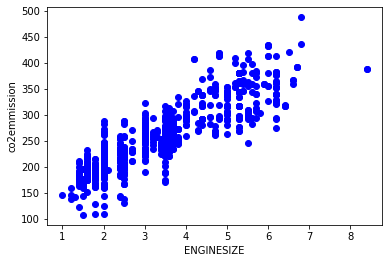

In [ ]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color= 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("co2emmission")
plt.show()

In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
reg.fit(train_x,train_y)
print('coefficient:',reg.coef_)
print('intercept:',reg.intercept_) 


coefficient: [[39.05020696]]
intercept: [126.61053037]


Text(0, 0.5, 'Emission')

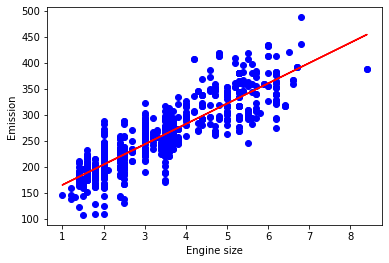

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y1 = reg.predict(test_x)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1 - test_y)))
print("mean value : %.2f"%np.mean((test_y-test_y)**2)) 
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 22.39
mean value : 0.00
R2-score: 0.77
